In [16]:
import tensorflow as tf
import os
import zipfile
import matplotlib.pyplot as plt
import random
import numpy as np

In [17]:
# Download the dataset (preprocessed version from TensorFlow)
url = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
path_to_zip = tf.keras.utils.get_file('cats_and_dogs_filtered.zip', origin=url)

with zipfile.ZipFile(path_to_zip, 'r') as zip_ref:
    zip_ref.extractall('/tmp')

# Directory paths
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'validation')

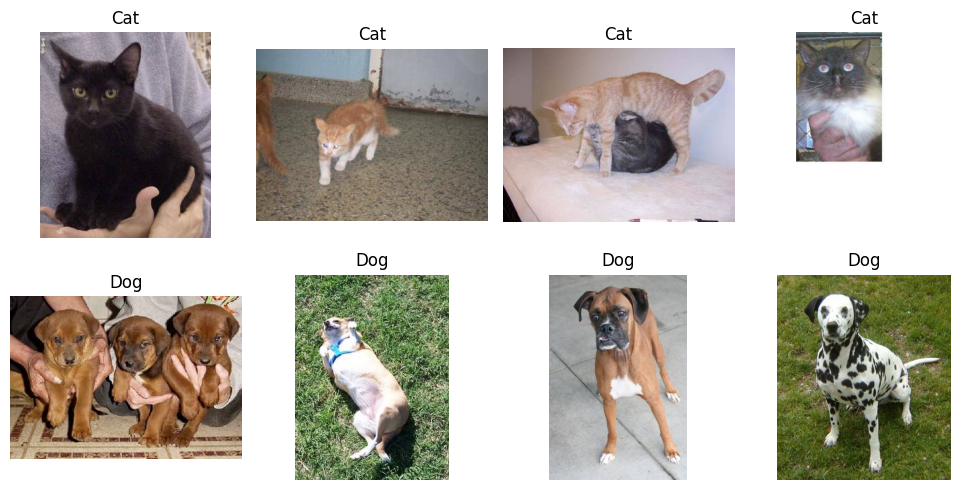

In [18]:
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

cat_imgs = os.listdir(train_cats_dir)
dog_imgs = os.listdir(train_dogs_dir)

plt.figure(figsize=(10, 5))

for i in range(4):
    plt.subplot(2, 4, i+1)
    img = plt.imread(os.path.join(train_cats_dir, cat_imgs[i]))
    plt.imshow(img)
    plt.title("Cat")
    plt.axis("off")

    plt.subplot(2, 4, i+5)
    img = plt.imread(os.path.join(train_dogs_dir, dog_imgs[i]))
    plt.imshow(img)
    plt.title("Dog")
    plt.axis("off")

plt.tight_layout()
plt.show()

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# For training — with augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# For validation — only rescaling
val_datagen = ImageDataGenerator(rescale=1./255)

In [20]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


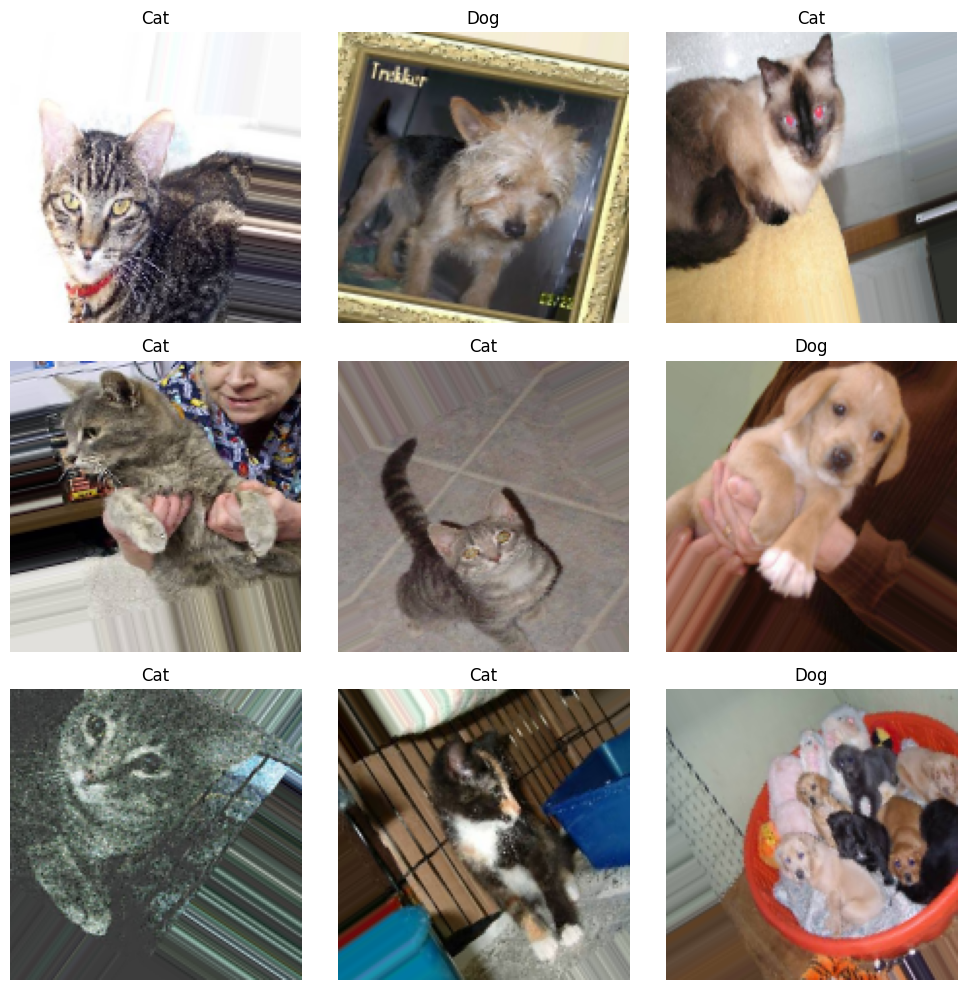

In [21]:
# Preview one batch of augmented images
images, labels = next(train_generator)

plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(images[i])
    plt.title("Cat" if labels[i] == 0 else "Dog")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [23]:
from tensorflow.keras import layers, models, Input

model = models.Sequential([
    Input(shape=(150, 150, 3)),   # <-- Explicit input layer
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

In [24]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,034,177 (72.61 MB)

 Trainable params: 19,034,177 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=10,
    validation_data=val_generator,
    validation_steps=50
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
 63/100 ━━━━━━━━━━━━━━━━━━━━ 1:10 2s/step - accuracy: 0.4862 - loss: 0.8641

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


100/100 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step - accuracy: 0.4871 - loss: 0.8193 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 134s 1s/step - accuracy: 0.4859 - loss: 0.6935 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 133s 1s/step - accuracy: 0.5105 - loss: 0.6935 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 135s 1s/step - accuracy: 0.4990 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 138s 1s/step - accuracy: 0.5155 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 139s 1s/step - accuracy: 0.5081 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 133s 1s/step - accuracy: 0.4902 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.5070 - loss: 0.6924 - val_accuracy: 0.581

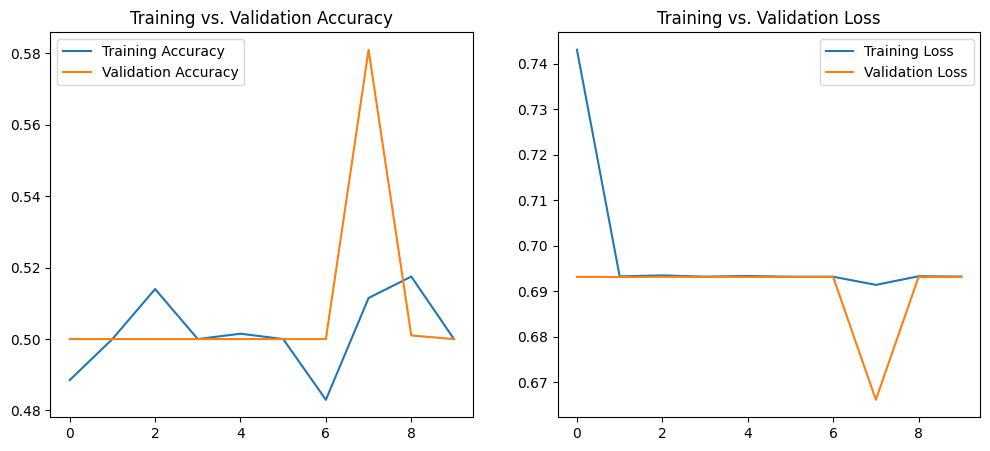

In [26]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend()
plt.title('Training vs. Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend()
plt.title('Training vs. Validation Loss')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


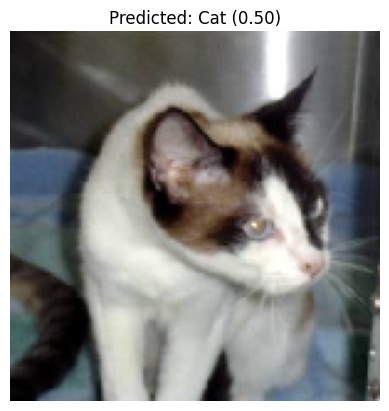

In [27]:
from tensorflow.keras.preprocessing import image

# Pick one validation image (e.g., a cat)
img_path = os.path.join(val_dir, 'cats', random.choice(os.listdir(os.path.join(val_dir, 'cats'))))
img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img) / 255.0
img_array = tf.expand_dims(img_array, 0)  # Add batch dimension

prediction = model.predict(img_array)[0][0]
label = "Dog" if prediction > 0.5 else "Cat"

plt.imshow(img)
plt.title(f"Predicted: {label} ({prediction:.2f})")
plt.axis('off')
plt.show()

In [28]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras import layers, models

IMG_SHAPE = (160, 160, 3)  # MobileNetV2 default minimum size

base_model = MobileNetV2(input_shape=IMG_SHAPE,
                         include_top=False,  # Exclude final classification layer
                         weights='imagenet')

base_model.trainable = False  # Freeze base model

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [29]:
# Wrap the base model with your custom classification head
inputs = tf.keras.Input(shape=IMG_SHAPE)
x = preprocess_input(inputs)  # Preprocessing specific to MobileNetV2
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.2)(x)
outputs = layers.Dense(1, activation='sigmoid')(x)

mobilenet_model = models.Model(inputs, outputs)

In [30]:
mobilenet_model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

mobilenet_model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 160, 160, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ true_divide (TrueDivide)        │ (None, 160, 160, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ subtract (Subtract)             │ (None, 160, 160, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_160            │ (None, 5, 5, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │         1,281 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,259,265 (8.62 MB)

 Trainable params: 1,281 (5.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [31]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(160, 160),  # New size for MobileNet
    batch_size=32,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(160, 160),
    batch_size=32,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [32]:
history_mobilenet = mobilenet_model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=5,  # Start with fewer epochs
    validation_data=val_generator,
    validation_steps=50
)

Epoch 1/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 82s 759ms/step - accuracy: 0.5238 - loss: 0.7155 - val_accuracy: 0.5000 - val_loss: 0.6940
Epoch 2/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 76s 762ms/step - accuracy: 0.5404 - loss: 0.7098 - val_accuracy: 0.5440 - val_loss: 0.6860
Epoch 3/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 104s 983ms/step - accuracy: 0.5180 - loss: 0.7192 - val_accuracy: 0.5330 - val_loss: 0.6872
Epoch 4/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 142s 983ms/step - accuracy: 0.5437 - loss: 0.7060 - val_accuracy: 0.5000 - val_loss: 0.6915
Epoch 5/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 79s 787ms/step - accuracy: 0.5033 - loss: 0.7115 - val_accuracy: 0.5640 - val_loss: 0.6827


In [33]:
# Unfreeze the base model
base_model.trainable = True

# Fine-tune from this layer onward
fine_tune_at = 100  # You can experiment with this number

for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

In [34]:
mobilenet_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [35]:
history_finetuned = mobilenet_model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=5,  # Add 5 more fine-tuning epochs
    validation_data=val_generator,
    validation_steps=50
)

Epoch 1/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 134s 1s/step - accuracy: 0.5079 - loss: 0.9737 - val_accuracy: 0.5000 - val_loss: 0.7738
Epoch 2/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 135s 1s/step - accuracy: 0.5588 - loss: 0.7020 - val_accuracy: 0.5000 - val_loss: 0.8332
Epoch 3/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 109s 1s/step - accuracy: 0.5879 - loss: 0.6807 - val_accuracy: 0.5000 - val_loss: 0.8556
Epoch 4/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 134s 999ms/step - accuracy: 0.6065 - loss: 0.6700 - val_accuracy: 0.5000 - val_loss: 0.8517
Epoch 5/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 138s 955ms/step - accuracy: 0.6139 - loss: 0.6601 - val_accuracy: 0.5000 - val_loss: 0.9065


In [37]:
def plot_history(histories, titles):
    plt.figure(figsize=(14, 6))

    # Accuracy
    plt.subplot(1, 2, 1)
    for history, label in zip(histories, titles):
        plt.plot(history.history['accuracy'], label=f'{label} - Train')
        plt.plot(history.history['val_accuracy'], label=f'{label} - Val')
    plt.title('Model Accuracy Comparison')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    for history, label in zip(histories, titles):
        plt.plot(history.history['loss'], label=f'{label} - Train')
        plt.plot(history.history['val_loss'], label=f'{label} - Val')
    plt.title('Model Loss Comparison')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

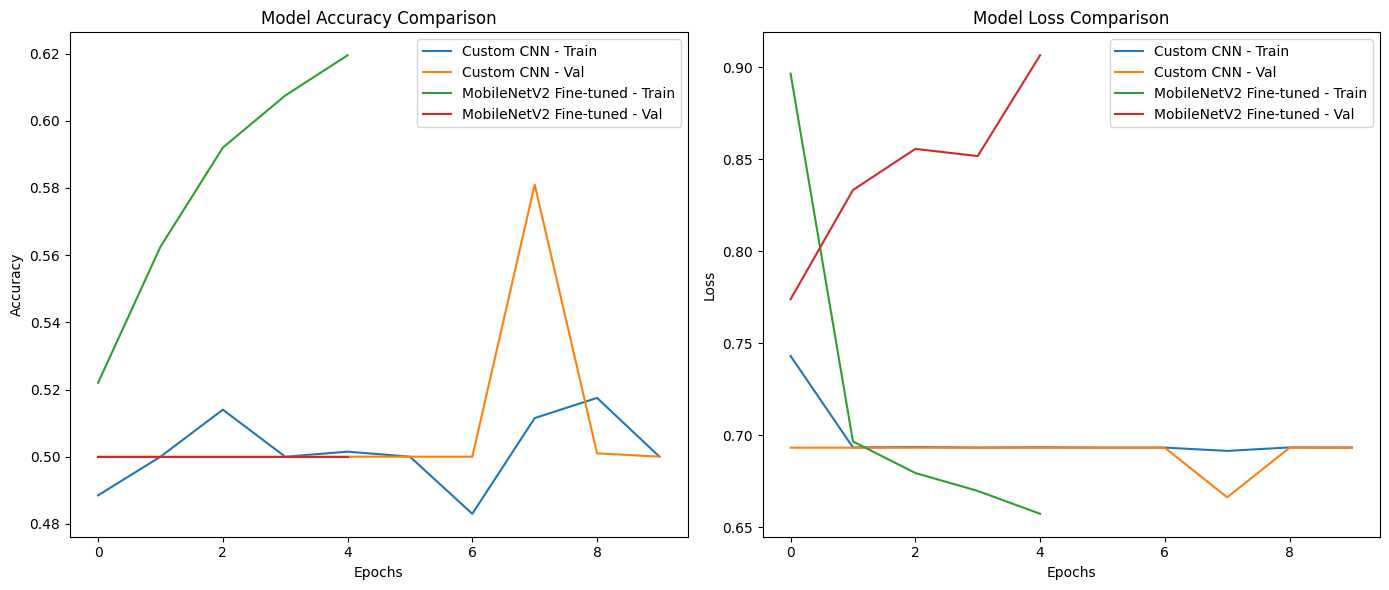

In [38]:
plot_history(
    [history, history_finetuned],
    ['Custom CNN', 'MobileNetV2 Fine-tuned']
)

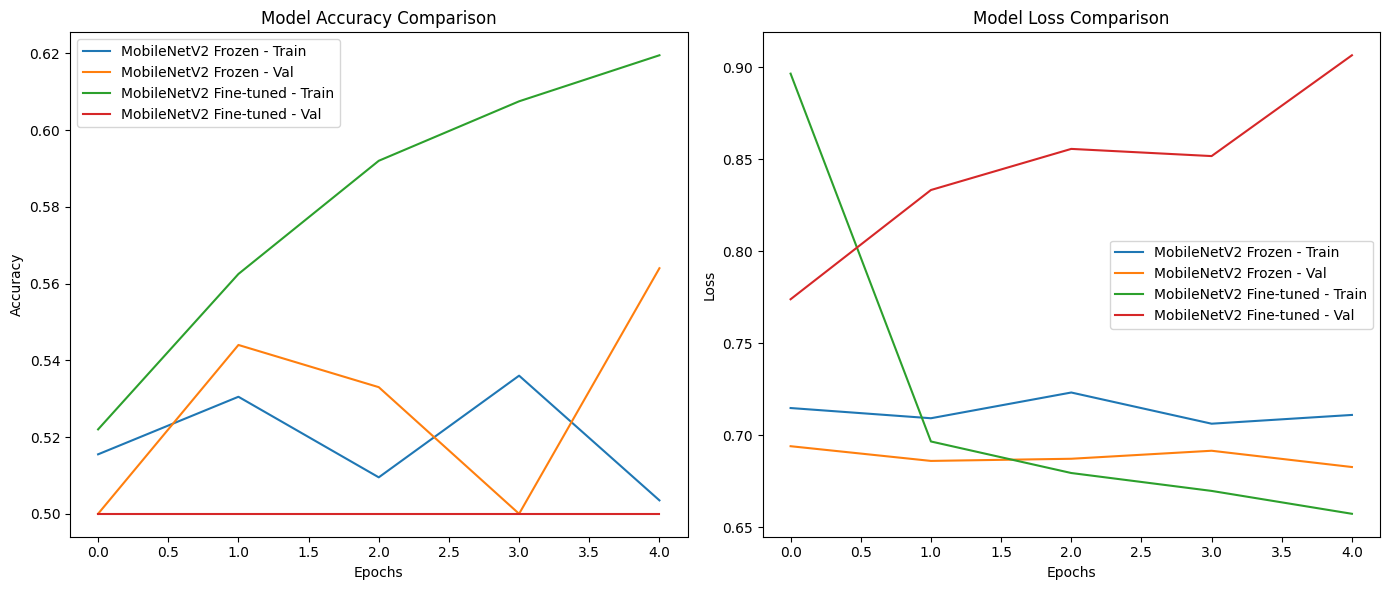

In [39]:
plot_history(
    [history_mobilenet, history_finetuned],
    ['MobileNetV2 Frozen', 'MobileNetV2 Fine-tuned']
)

In [40]:
final_cnn_acc = history.history['val_accuracy'][-1] * 100
final_mobilenet_acc = history_finetuned.history['val_accuracy'][-1] * 100

print(f"Custom CNN Validation Accuracy: {final_cnn_acc:.2f}%")
print(f"MobileNetV2 Fine-tuned Validation Accuracy: {final_mobilenet_acc:.2f}%")

Custom CNN Validation Accuracy: 50.00%
MobileNetV2 Fine-tuned Validation Accuracy: 50.00%


In [50]:
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense

# Rebuild classifier head (same as what you used in mobilenet_model)
gap_input = Input(shape=base_model.output.shape[1:])
x = GlobalAveragePooling2D()(gap_input)
x = Dropout(0.2)(x)
output = Dense(1, activation='sigmoid')(x)

classifier_model = Model(inputs=gap_input, outputs=output)

In [51]:
def make_gradcam_heatmap(img_array, base_model, classifier_model, last_conv_layer_name):
    grad_model = tf.keras.models.Model(
        inputs=base_model.input,
        outputs=[base_model.get_layer(last_conv_layer_name).output, base_model.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, base_output = grad_model(img_array)
        tape.watch(conv_outputs)

        preds = classifier_model(base_output, training=False)
        class_output = preds[:, 0]

    grads = tape.gradient(class_output, conv_outputs)[0]
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1))
    conv_outputs = conv_outputs[0]

    heatmap = tf.reduce_sum(pooled_grads * conv_outputs, axis=-1)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap + 1e-10)
    return heatmap.numpy()

In [52]:
from tensorflow.keras.preprocessing import image
import random
import numpy as np

img_path = os.path.join(val_dir, 'cats', random.choice(os.listdir(os.path.join(val_dir, 'cats'))))

img = image.load_img(img_path, target_size=(160, 160))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = tf.keras.applications.mobilenet_v2.preprocess_input(img_array)

In [53]:
heatmap = make_gradcam_heatmap(
    img_array,
    base_model=base_model,
    classifier_model=classifier_model,
    last_conv_layer_name='Conv_1'
)

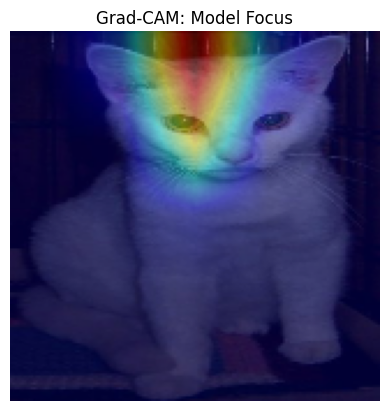

In [54]:
import cv2
import matplotlib.pyplot as plt

heatmap = np.uint8(255 * heatmap)
heatmap = cv2.resize(heatmap, (160, 160))
heatmap_color = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

img_display = cv2.imread(img_path)
img_display = cv2.resize(img_display, (160, 160))
superimposed_img = cv2.addWeighted(img_display, 0.6, heatmap_color, 0.4, 0)
superimposed_img = cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB)

plt.imshow(superimposed_img)
plt.title("Grad-CAM: Model Focus")
plt.axis('off')
plt.show()